In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 10:31:27,197] A new study created in memory with name: no-name-ac869a7d-c093-4538-8fba-cda7a053f23d
[I 2025-04-27 10:31:31,548] Trial 0 finished with value: 0.9605263157894738 and parameters: {'n_estimators': 863, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9605263157894738.
[I 2025-04-27 10:31:33,152] Trial 1 finished with value: 0.9578947368421051 and parameters: {'n_estimators': 341, 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.9605263157894738.
[I 2025-04-27 10:31:37,226] Trial 2 finished with value: 0.9447368421052632 and parameters: {'n_estimators': 834, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.9605263157894738.
[I 2025-04-27 10:31:40,557] Trial 3 finished with value: 0.9421052631578947 and parameters: {'n_estimators': 568, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 20}. Best is trial 0 with va

Best trial:
Accuracy: 0.9710526315789474
Best hyperparameters:  {'n_estimators': 237, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 2}


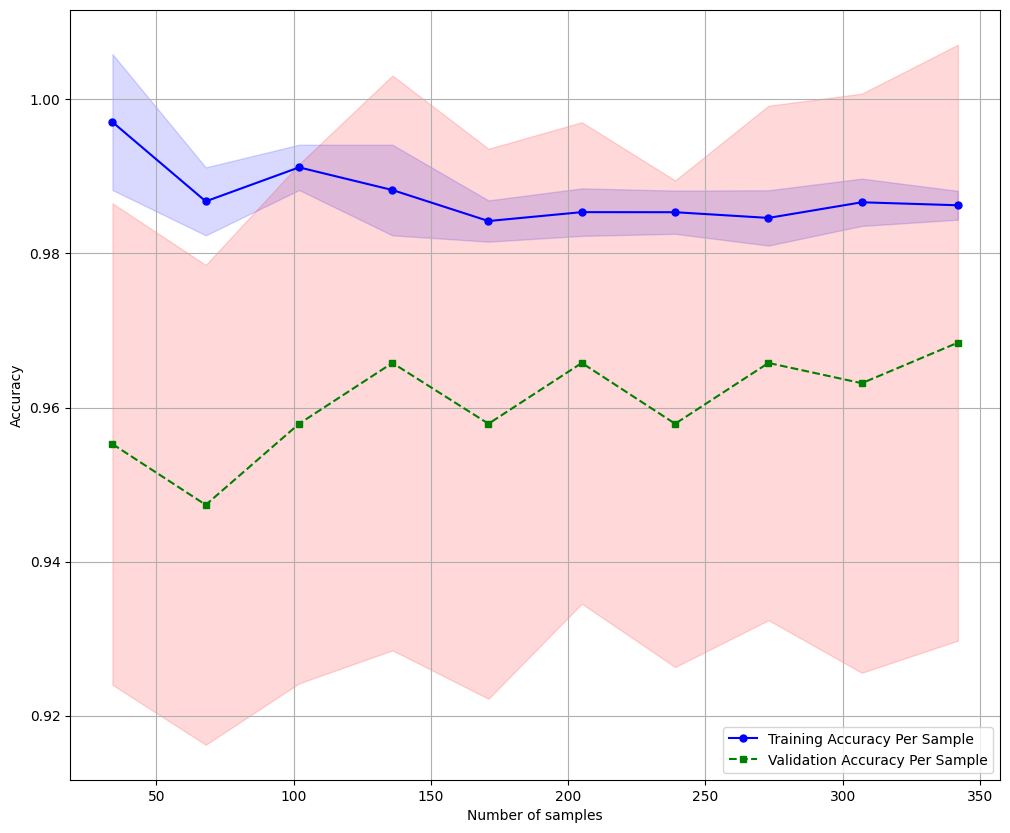

Confusion Matrix
[[ 57   7]
 [  3 104]]
Accuracy: 0.9415, Precision: 0.9369, Recall: 0.9720, F1: 0.9541, AUC: 0.9901


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

helper.train_and_evaluate_model('rf', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)